## Importing neccessary packages

In [2]:

%matplotlib inline

#package for image recognition 
import cv2

import numpy as np

#package for plotting 
from matplotlib import pyplot as plt


from PIL import Image

#package for getting text from an image 
import pytesseract


## Read the image 


In [13]:
## (1) read
img = cv2.imread("image.png")


## Color change and showing the image with opencv package

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray)
cv2.waitKey(0)

-1

##  Showing the image by using matplatlib library 

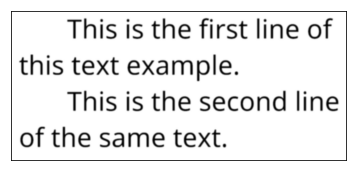

In [15]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## getting the text from the image file by using "tesseract" module 

In [16]:
# to work with terseract the following step is a necessity 
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"


text = pytesseract.image_to_string(Image.open('image.png'))
#print(text)
print('\n'.join([i for i in text.split('\n') if len(i) > 0]))

This is the first line of
this text example.
This is the second line
of the same text.


## Simple Thresholding


Here, the matter is straight forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY. All simple thresholding types are:

* cv.THRESH_BINARY
* cv.THRESH_BINARY_INV
* cv.THRESH_TRUNC
* cv.THRESH_TOZERO
* cv.THRESH_TOZERO_INV

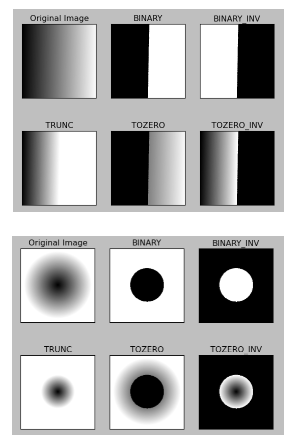

# Preprossing of images before ORC

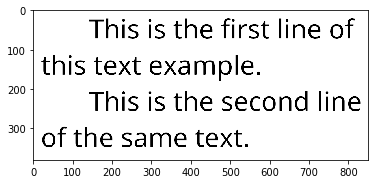

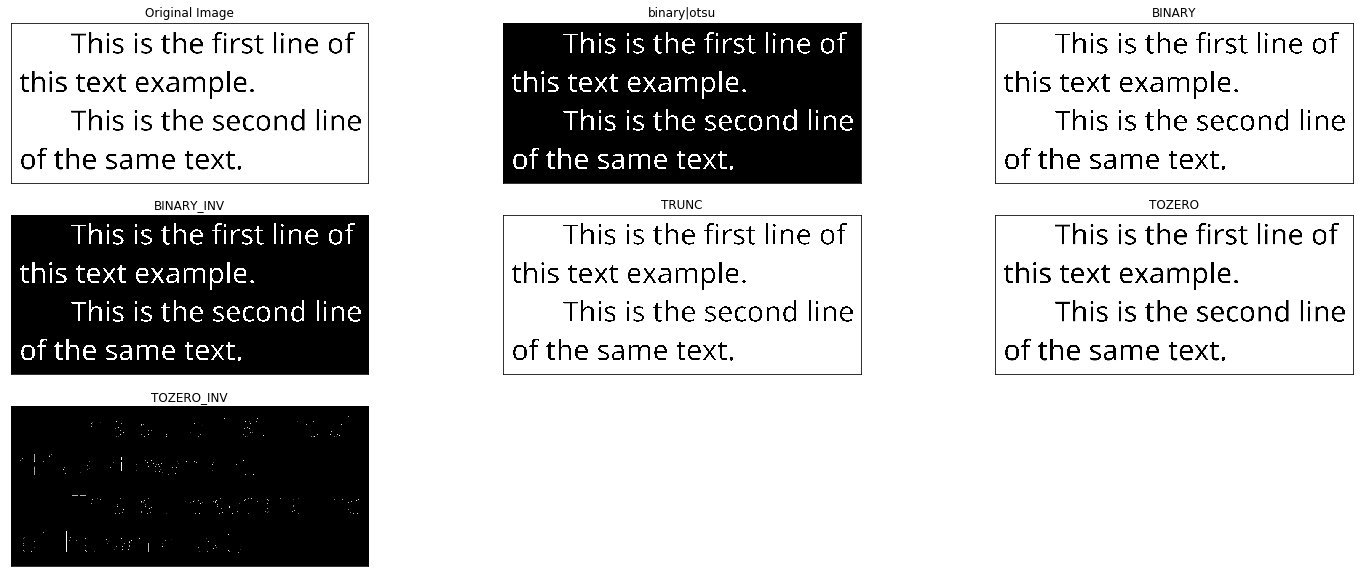

In [21]:


##  read

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
type(img1)

plt.imshow(img1)
plt.show()
#plt.imshow(gray,'gray')



#applying different Threshold techniques
ret,thresh  = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)


titles = ['Original Image','binary|otsu','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray,thresh, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(25,10))
for i in range(7):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

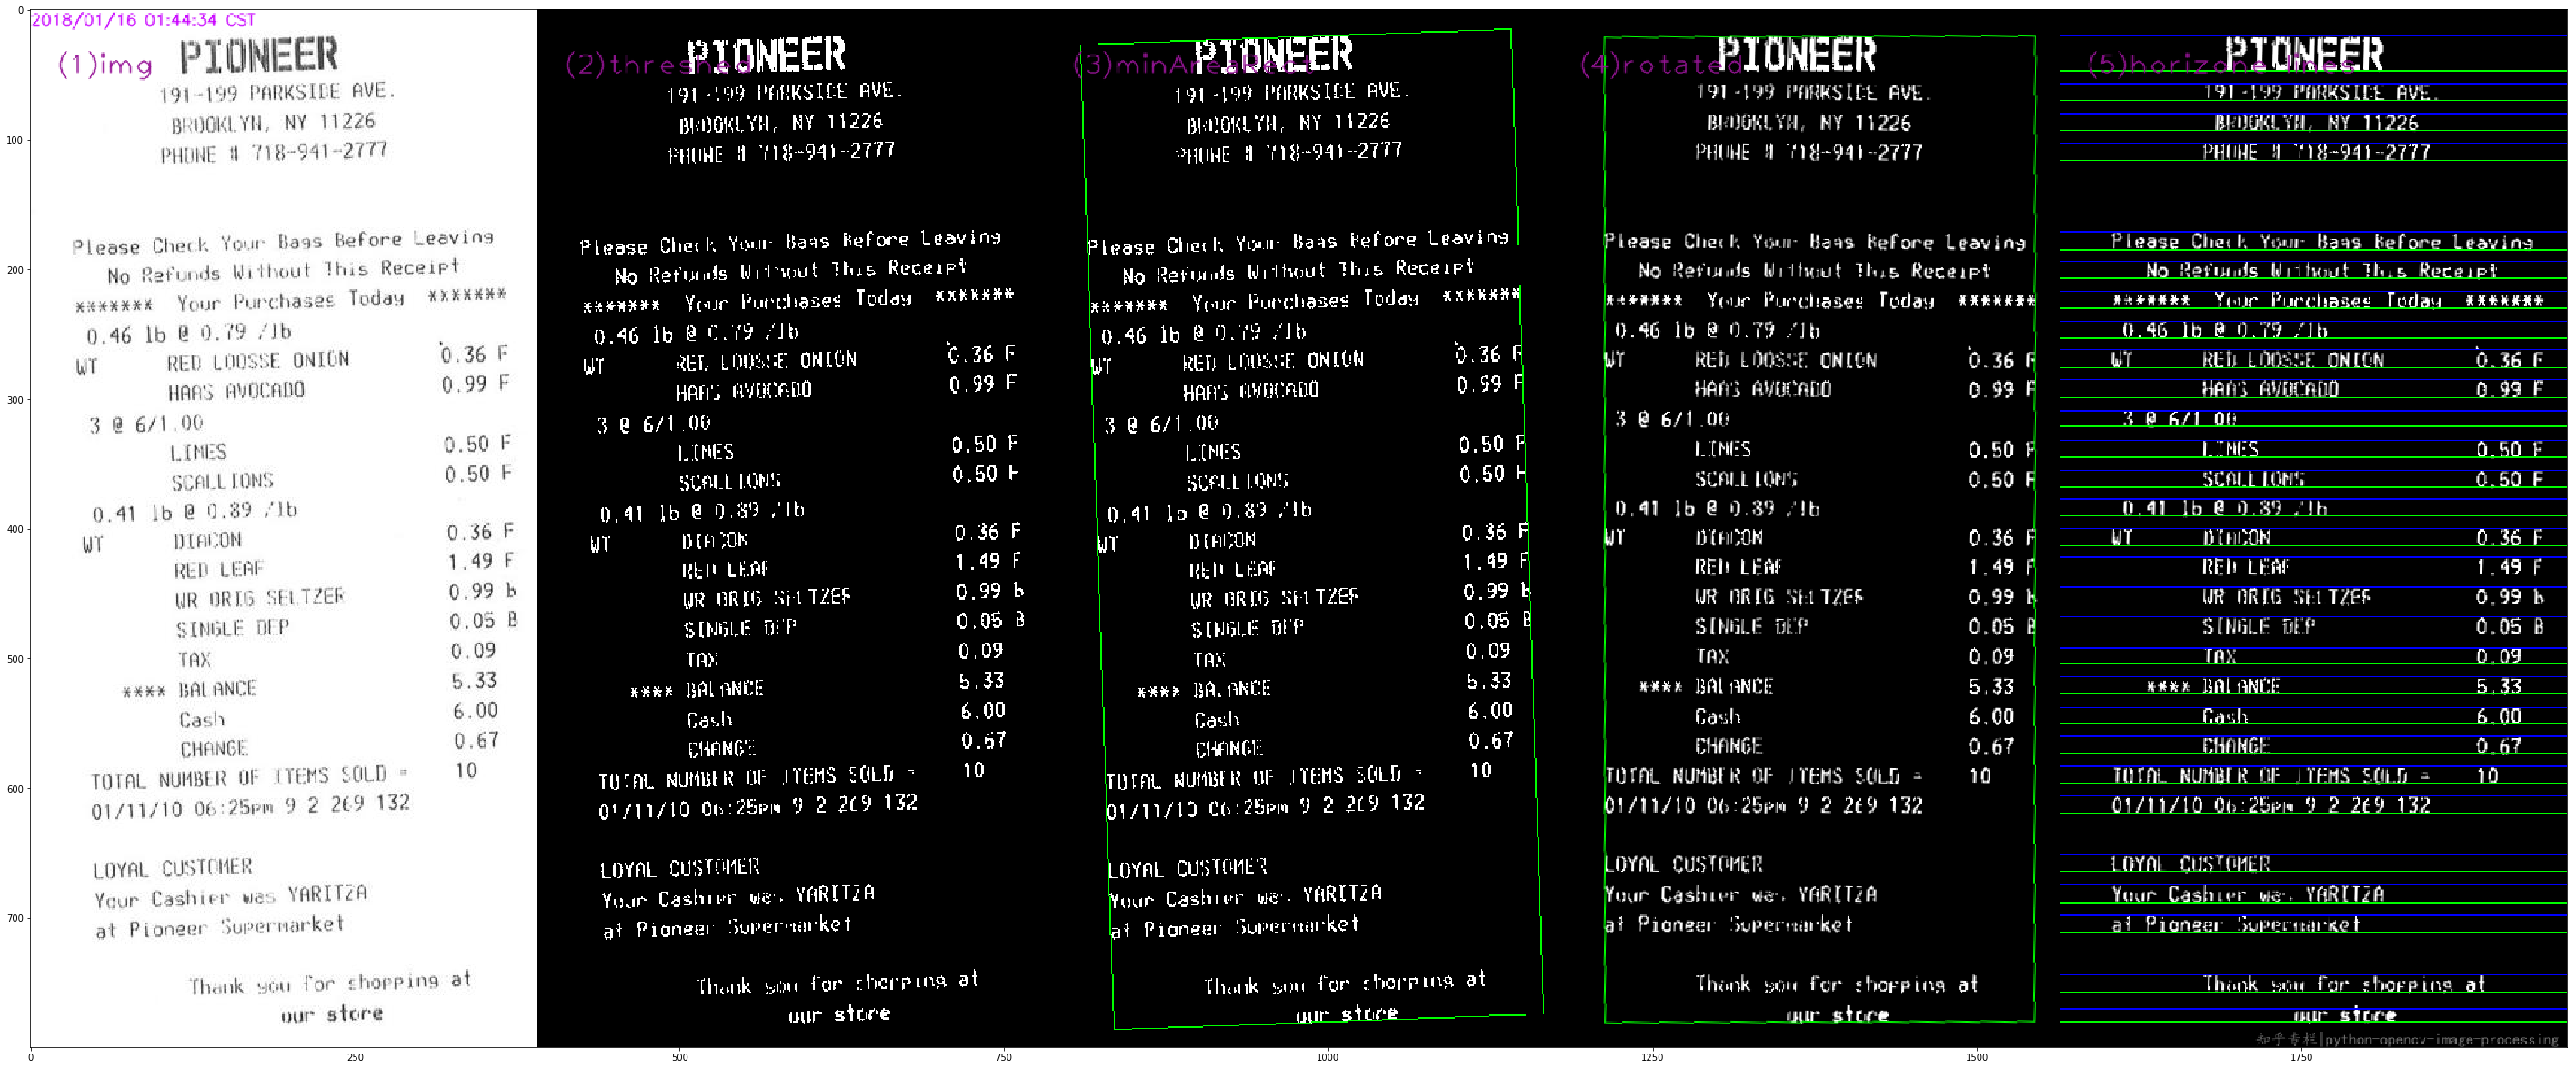

In [5]:
plt.figure(figsize=(50,50))
plt.imshow(Image.open('preprocessing_image.png'))

In [22]:


## (3) minAreaRect on the nozeros
pts = cv2.findNonZero(thresh)
ret = cv2.minAreaRect(pts)

(cx,cy), (w,h), ang = ret
if w<h:
    w,h = h,w
    ang += 90

## (4) Find rotated matrix, do rotation
M = cv2.getRotationMatrix2D((cx,cy), ang, 1.0)
rotated = cv2.warpAffine(thresh, M, (img.shape[1], img.shape[0]))

## (5) find and draw the upper and lower boundary of each lines
hist = cv2.reduce(rotated,1, cv2.REDUCE_AVG).reshape(-1)

th = 2
H,W = img.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

rotated = cv2.cvtColor(rotated, cv2.COLOR_GRAY2BGR)
for y in uppers:
    cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

for y in lowers:
    cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)

cv2.imwrite("result.png", rotated)
cv2.imshow("result.png",gray)
cv2.waitKey(0)

-1

In [25]:
text_afterlinedrawn = pytesseract.image_to_string(Image.open('result.png'))
#print(text_afterlinedrawn)
    
print('\n'.join([i for i in text_afterlinedrawn.split('\n') if len(i) > 0]))


This is the first line of
 
this text example.
 
This is the second line
 
of the same text.
